In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [3]:
dataset =tf.keras.preprocessing.image_dataset_from_directory("Original Image\PotatoPlants",
                                                    shuffle=True,# Shuffle the data for better training performance  يعني يجمع الصور عشوايائيا
                                                    image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE
                                                    )

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

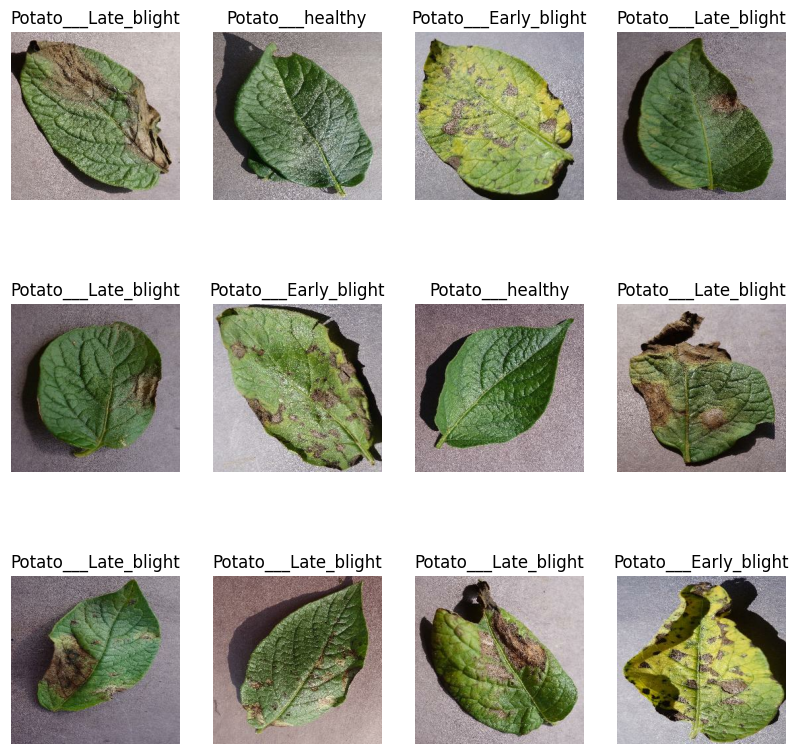

In [5]:
plt.figure(figsize=(10,10))
for image_batch, lable_batch in dataset.take(1):
    for i in range(12):
        ax = plt. subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[lable_batch[i]])
        plt.axis("off")

In [6]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_spilt=0.1,shuffle=True,shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    
    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)

    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).take(val_size)

    return train_ds,val_ds,test_ds

In [7]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [11]:
tarai_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
tf.keras.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(IMAGE_SIZE, IMAGE_SIZE),  
    keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
tf.keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),  
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
])